# Model Free learning methods
---

In the previous session we asssumed that we had a true model of the environment formalized as an MDP. Contrary to the Dynamic Programming methods, we no longer assume the full knowlege of the environment.

The methods presented in this session learn from just experience- sequences of states, actions, and rewards from actual interaction with an
environment.





## Monte Carlo learning

Remember that return from a state $G_t$ is defined as -
$$G_t = R_t + \gamma R_{t+1}+ \gamma^2 R_{t+2}+ \gamma^3 R_{t+3}+\dots + \gamma^{T-t} R_{T}$$ and the value function of a state = $E[G_t | S_t =s]$

An obvious way to estimate it from
experience, then, is simply to average the returns observed after visits to that state.



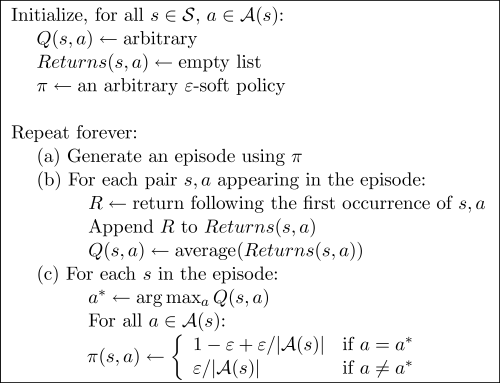

# Temporal Difference Methods

Problems with MC
 1. MC is a model free method, but has to reach the end of episode, as such cannot be used for continuing tasks.

 2. Also It has relatively high variance, since is an culmination of random rewards until end.
 
 3. Return of one state, doesnot depend on value function of any other, i.e. doesnot bootstrap.  

Hence we go for a better approach called TD that does not require Model knowledge but also uses Bootstrapping. 
Like DP, TD methods update estimates based in part on other learned
estimates, without waiting for a final outcome (they bootstrap). 

The update equation for simple TD (also called one step TD or TD(0))

 
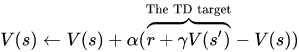

ALgorithm for policy evaluation


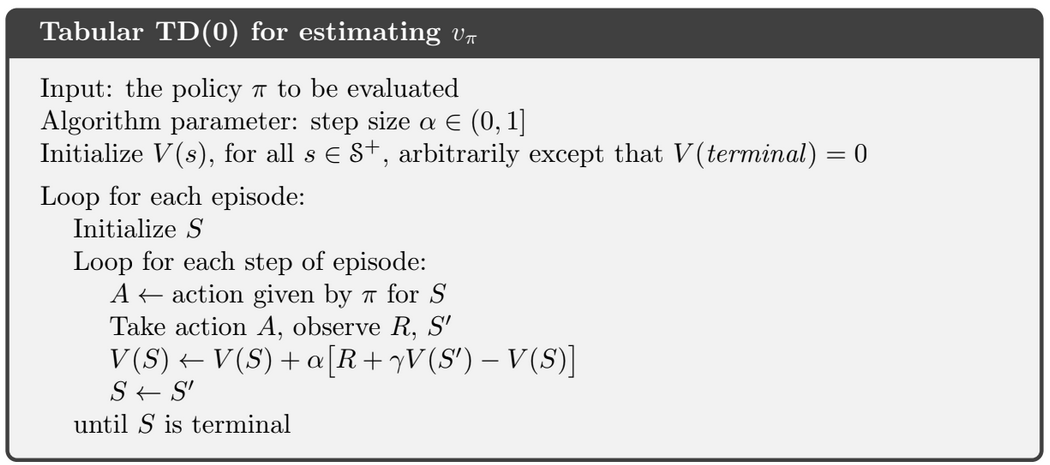

### n-step TD and TD lambda

Neither MC methods nor
one-step TD methods are always the best.Methods in which the temporal difference extends
over n steps are called n-step TD methods.In these the updates to the value function are made by first looking at n susequent Rewards obtained, then we use the nth state value function to Bootstrap.

n-step TD can be said as good compromise of MC and one step TD.

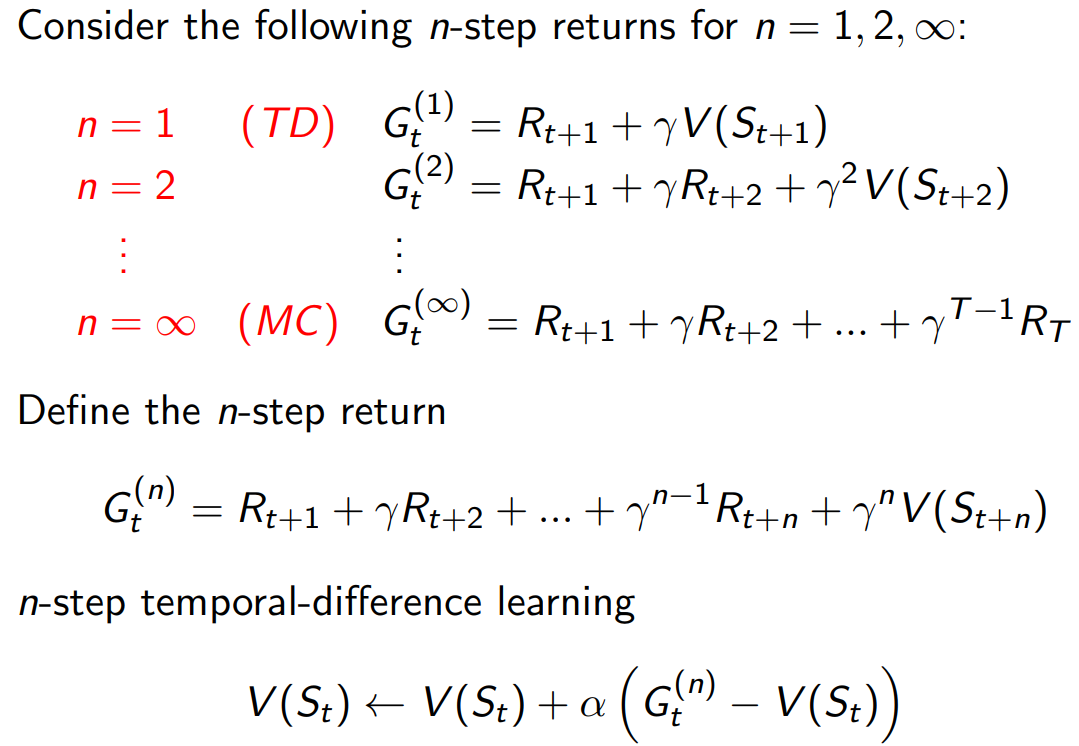


### TD lambda


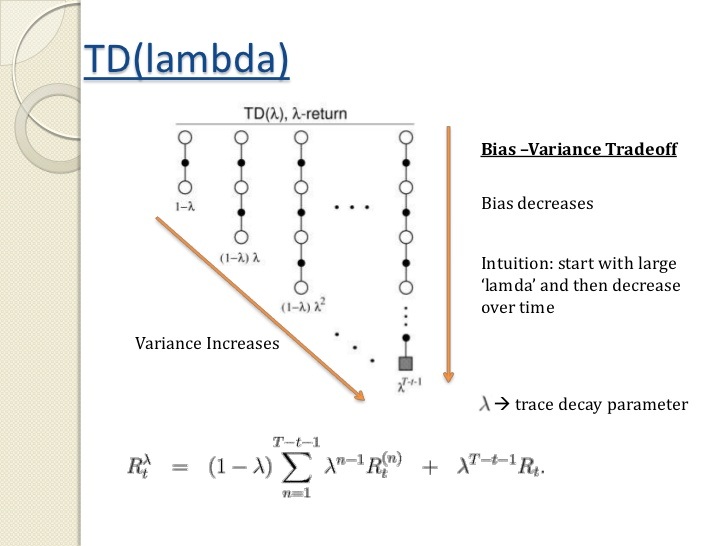

# Model Free Control 

### Sample Problem

Let's Take a sample Problem

![title](./sp.png)

We model this problem using `OpenAI gym`.
1. This is a typical grid world, with 4 stochastic actions. The actions might result in
movement in a direction other than the one intended with a probability of 0.1. For
example, if the selected action is N (north), it will transition to the cell one above your
current position with probability 0.9. It will transition to one of the other neighbouring
cells with probability 0.1/3.
2. There is also a gentle Westerly blowing, that will push you one additional cell to the
east, regardless of the effect of the action you took, with a probability of 0.5
3. The episodes start in one the start states in the first column, with equal probability.

## Q-Learning

In Q-learning, the agent starts out in state S, performs action A, sees what the highest possible reward is for taking any action from its new state, T, and updates its value for the state S-action A pair based on this new highest possible value.

![title](./qlearn.svg)



In [1]:
# numpy and scipy are available for use
import gym 
import itertools 
import matplotlib.pyplot as plt
import matplotlib.style 
import numpy as np 
import pandas as pd 
import sys 
from collections import defaultdict



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


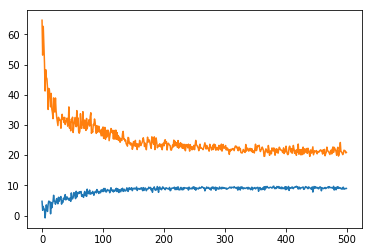

In [2]:
variant = 'A'

import gridworld_env
env = gym.make("Gridworld-q1-v0",Variant = variant)


def CreateEtaGreedyPolicy(Values,epsilon):
    def fun(state):
        num_actions = len(Values[state])
        probs = (epsilon/num_actions)* np.ones(num_actions)
        greedy_action = np.argmax(Values[state])
        probs[greedy_action]+=(1.0 - epsilon)
        return np.random.choice(range(num_actions),p=probs)

    return fun


def makeOptimalAction(Qvals):
    """transforms the defaultdict data structure to a 2D array
    """
    grid = np.zeros((12,12))
    for i in range(12):
        for j in range(12):
            grid[i][j] = np.argmax(Qvals[(i+1,j+1)])
    return grid
def make2Darr(Qvals):
    """transforms the defaultdict data structure to a 2D array
    """
    grid = np.zeros((12,12))
    for i in range(12):
        for j in range(12):
            grid[i][j] = np.max(Qvals[(i+1,j+1)])
    return grid





def QLearning(env,num_episodes,discount=0.9,alpha = 0.5,epsilon = 0.1):

    episode_steps_taken = np.zeros(num_episodes)
    episode_rewards = np.zeros(num_episodes)

    Qvals = defaultdict(lambda: np.zeros(len(env.actions)))

    policy = CreateEtaGreedyPolicy(Qvals,epsilon)

    for episode in range(num_episodes):
        #print("episode number:",episode)
        state = env.reset()
        #print("start_state:",env.agent_start_state)
        done = False
        num_steps=0
        while not done:
            num_steps+=1

            action = policy(state)
            next_state,reward,done,_ = env.step(action)

            #print("next state = ",next_state,"reward =",reward)
            episode_rewards[episode]+=reward
            episode_steps_taken[episode] = num_steps

            td_target = reward + discount*(np.max(Qvals[next_state]))
            td_error = td_target - Qvals[state][action]
            Qvals[state][action] += alpha*td_error

            state = next_state
    #print(episode_steps_taken)
    #print(episode_rewards)
    return episode_steps_taken,episode_rewards,Qvals


def plot_heatmap(Qvals):
    grid_heatmap = np.zeros((12,12))
    for i in range(12):
        for j in range(12):
            grid_heatmap[i][j] = np.max(Qvals[(i+1,j+1)])
    from seaborn import heatmap
    heatmap(grid_heatmap)
    plt.show()

n_runs = 50
n_episodes = 500
avg_steps = np.zeros(n_episodes)
avg_rewards = np.zeros(n_episodes)
for i in range(n_runs):
    print(i)
    steps,rewards,Qvals = QLearning(env,n_episodes)
    avg_rewards = avg_rewards + (rewards -avg_rewards)/(i+1)
    avg_steps = avg_steps + (steps -avg_steps)/(i+1)
plt.plot(range(n_episodes),avg_rewards)
plt.plot(range(n_episodes),avg_steps)
plt.show()







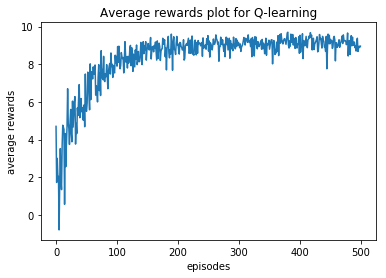

In [3]:
plt.plot(range(n_episodes),avg_rewards)
plt.xlabel('episodes')
plt.ylabel('average rewards')
plt.title("Average rewards plot for Q-learning")
plt.savefig(variant +' Q-learning-reward500.png')

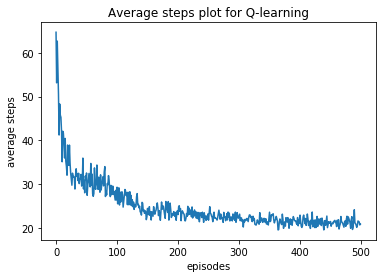

In [4]:
plt.plot(range(n_episodes),avg_steps)
plt.xlabel('episodes')
plt.ylabel('average steps')

plt.title("Average steps plot for Q-learning")
plt.savefig(variant+' Q-learning-steps500.png')

In [5]:
avg_rewards

array([ 4.7 ,  1.72,  3.  ,  2.04,  2.04, -0.8 ,  1.64,  3.52,  1.88,
        1.34,  3.68,  4.76,  4.66,  4.54,  0.56,  4.32,  2.56,  3.76,
        4.66,  6.7 ,  4.86,  4.6 ,  3.74,  4.94,  5.6 ,  4.3 ,  3.88,
        6.04,  4.66,  5.38,  6.02,  6.28,  3.76,  4.86,  4.32,  5.68,
        5.28,  6.22,  6.92,  5.16,  5.94,  6.18,  5.48,  5.7 ,  5.08,
        5.02,  5.84,  4.68,  7.48,  5.58,  5.5 ,  5.94,  7.58,  7.44,
        6.34,  5.58,  8.02,  6.12,  7.6 ,  7.56,  7.22,  7.86,  7.46,
        7.8 ,  7.96,  6.36,  6.86,  6.56,  6.  ,  7.32,  7.98,  6.6 ,
        7.56,  6.34,  8.72,  7.28,  7.72,  7.18,  8.42,  7.14,  7.08,
        7.5 ,  7.34,  7.98,  7.34,  6.7 ,  7.62,  7.88,  8.04,  7.48,
        8.6 ,  7.88,  8.  ,  7.3 ,  7.94,  7.62,  7.54,  8.48,  8.08,
        8.42,  7.9 ,  8.94,  8.1 ,  8.96,  8.22,  7.76,  7.94,  8.62,
        8.4 ,  8.3 ,  8.36,  7.54,  8.28,  9.2 ,  8.5 ,  8.1 ,  8.4 ,
        7.8 ,  8.42,  8.06,  8.22,  8.88,  9.  ,  7.92,  8.88,  8.52,
        7.62,  8.54,

In [6]:
avg_steps

array([64.66, 53.12, 62.64, 56.2 , 50.54, 41.22, 48.3 , 45.74, 45.26,
       42.08, 35.12, 42.08, 41.7 , 39.4 , 35.98, 40.44, 35.26, 34.08,
       32.06, 38.94, 34.32, 34.32, 38.92, 34.78, 32.54, 31.04, 29.78,
       32.52, 31.6 , 31.78, 31.4 , 28.9 , 32.04, 33.52, 31.8 , 32.42,
       30.82, 32.5 , 30.14, 31.28, 31.14, 32.24, 29.58, 30.2 , 35.96,
       28.94, 30.92, 28.04, 31.88, 30.9 , 32.56, 27.48, 29.7 , 31.1 ,
       32.46, 30.36, 29.4 , 34.74, 29.74, 32.32, 27.82, 27.24, 27.88,
       33.72, 29.2 , 28.84, 30.8 , 34.38, 29.88, 28.82, 31.62, 30.1 ,
       28.18, 32.14, 28.68, 30.  , 30.64, 31.7 , 29.62, 32.8 , 34.02,
       27.2 , 28.36, 27.58, 30.16, 29.86, 31.96, 30.94, 28.64, 27.18,
       29.74, 27.6 , 28.08, 29.58, 27.68, 28.38, 27.32, 26.38, 28.62,
       26.42, 29.32, 25.54, 26.66, 29.18, 25.26, 28.22, 25.92, 27.22,
       28.28, 27.58, 24.78, 26.1 , 27.18, 28.8 , 28.46, 27.42, 28.  ,
       25.34, 28.18, 25.34, 25.38, 28.28, 25.28, 27.46, 25.1 , 26.48,
       24.86, 25.92,

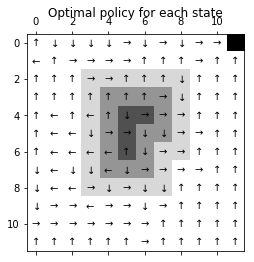

In [7]:
#def optimalPolicyPlot():
fig,ax = plt.subplots()
Grid_mat  = np.zeros((12,12))
Grid_mat[env.agent_goal_state[0]-1][env.agent_goal_state[1]-1] += 4
for x,y in env.puddle1:
    Grid_mat[x-1][y-1] += 1
for x,y in env.puddle2:
    Grid_mat[x-1][y-1] += 2

for x,y in env.puddle3:
    Grid_mat[x-1][y-1] += 3
arrows = {0:'↑',1:'$\downarrow$',2:'$\leftarrow$',3:'→'}


ax.matshow(Grid_mat,cmap = 'Greys')
for i in range(12):
    for j in range(12):
        ax.text(j,i,arrows[makeOptimalAction(Qvals)[i][j]],va='center',ha='center')
plt.title('Optimal policy for each state')
plt.savefig(str(variant)+'sarsa0.9-opt-policy'+str(n_episodes)+'.png')
plt.show()


## SARSA

State–action–reward–state–action (SARSA) is an algorithm for learning a Markov decision process policy

image.png

A SARSA agent interacts with the environment and updates the policy based on actions taken, hence this is known as an on-policy learning algorithm. The Q value for a state-action is updated by an error, adjusted by the learning rate alpha. Q values represent the possible reward received in the next time step for taking action a in state s, plus the discounted future reward received from the next state-action observation

In [ ]:
# numpy and scipy are available for use
import gym 
import itertools 
import matplotlib.pyplot as plt
import matplotlib.style 
import numpy as np 
import pandas as pd 
import sys 
from collections import defaultdict

In [ ]:
variant = 'A'

import gridworld_env
env = gym.make("Gridworld-q1-v0",Variant = variant)

def CreateEtaGreedyPolicy(Values,epsilon):
    def fun(state):
        num_actions = len(Values[state])
        probs = (epsilon/num_actions)* np.ones(num_actions)
        greedy_action = np.argmax(Values[state])
        probs[greedy_action]+=(1.0 - epsilon)
        return np.random.choice(range(num_actions),p=probs)

    return fun


def sarsaLearning(env,num_episodes,discount=0.9,alpha = 0.5,epsilon = 0.1):

    episode_steps_taken = np.zeros(num_episodes)
    episode_rewards = np.zeros(num_episodes)

    Qvals = defaultdict(lambda: np.zeros(len(env.actions)))

    policy = CreateEtaGreedyPolicy(Qvals,epsilon)

    for episode in range(num_episodes):
        #print("episode number:",episode)
        state = env.reset()
        #print("start_state:",env.agent_start_state)
        done = False
        num_steps=0
        action = policy(state)

        while not done:
            num_steps+=1

            #
            next_state,reward,done,_ = env.step(action)

            #print("next state = ",next_state,"reward =",reward)
            episode_rewards[episode]+=reward
            episode_steps_taken[episode] = num_steps

            next_action = policy(next_state)

            td_target = reward + discount*(Qvals[next_state][next_action])
            td_error = td_target - Qvals[state][action]
            Qvals[state][action] += alpha*td_error

            action = next_action
            state = next_state
    #print(episode_steps_taken)
    #print(episode_rewards)
    return episode_steps_taken,episode_rewards,Qvals


def plot_heatmap(Qvals):
    grid_heatmap = np.zeros((12,12))
    for i in range(12):
        for j in range(12):
            grid_heatmap[i][j] = np.max(Qvals[(i+1,j+1)])
    from seaborn import heatmap
    heatmap(grid_heatmap)
    plt.show()

n_runs = 50
n_episodes = 500
avg_steps = np.zeros(n_episodes)
avg_rewards = np.zeros(n_episodes)
for i in range(n_runs):
    print(i)
    steps,rewards,Qvals = sarsaLearning(env,n_episodes)
    avg_rewards = avg_rewards + (rewards -avg_rewards)/(i+1)
    avg_steps = avg_steps + (steps -avg_steps)/(i+1)
plt.plot(range(n_episodes),avg_rewards)
plt.plot(range(n_episodes),avg_steps)
plt.show()







In [ ]:

def makeOptimalAction(Qvals):
    """transforms the defaultdict data structure to a 2D array
    """
    grid = np.zeros((12,12))
    for i in range(12):
        for j in range(12):
            grid[i][j] = np.argmax(Qvals[(i+1,j+1)])
    return grid
def make2Darr(Qvals):
    """transforms the defaultdict data structure to a 2D array
    """
    grid = np.zeros((12,12))
    for i in range(12):
        for j in range(12):
            grid[i][j] = np.max(Qvals[(i+1,j+1)])
    return grid





In [ ]:
A = makeOptimalAction(Qvals)
A

In [ ]:
plt.plot(range(n_episodes),avg_rewards)
plt.xlabel('episodes')
plt.ylabel('average rewards')
plt.title("Average rewards plot for Sarsa "+variant)
plt.savefig(variant+ ' sarsa-reward'+str(n_episodes)+'.png')

In [ ]:
plt.plot(range(n_episodes),avg_steps)
plt.xlabel('episodes')
plt.ylabel('average steps')
plt.title("Average steps plot for Sarsa")
plt.savefig(variant + 'sarsa-steps'+str(n_episodes)+'.png')

In [ ]:
avg_steps

In [ ]:
#def optimalPolicyPlot():
fig,ax = plt.subplots()
Grid_mat  = np.zeros((12,12))
Grid_mat[env.agent_goal_state[0]-1][env.agent_goal_state[1]-1] += 4
for x,y in env.puddle1:
    Grid_mat[x-1][y-1] += 1
for x,y in env.puddle2:
    Grid_mat[x-1][y-1] += 2

for x,y in env.puddle3:
    Grid_mat[x-1][y-1] += 3
arrows = {0:'↑',1:'$\downarrow$',2:'$\leftarrow$',3:'→'}


ax.matshow(Grid_mat,cmap = 'Greys')
for i in range(12):
    for j in range(12):
        ax.text(j,i,arrows[makeOptimalAction(Qvals)[i][j]],va='center',ha='center')
plt.title('Optimal policy for each state')
plt.savefig(str(variant)+' sarsa0.9-opt-policy'+str(n_episodes)+'.png')
plt.show()

A famous illustration of the differences in performance between Q-learning and SARSA is the cliff-walking example from Sutton and Barto's Reinforcement Learning: An Introduction

![title](./cliff.png)

There is a penalty of -1 for each step that the agent takes, and a penalty of -100 for falling off the cliff. The optimal path is, therefore, to run exactly along the edge of the cliff and reach the reward as quickly as possible. This minimizes the number of steps the agent takes and maximizes its reward as long as it does not fall into the cliff at any point.

Q-learning takes the optimal path in this example, while SARSA takes the safe path. The result is that there is a nonzero risk (with an epsilon-greedy or other exploration-based policy) that at any point a Q-learning agent will fall off the cliff as a result of choosing exploration.SARSA, unlike Q-learning, looks ahead to the next action to see what the agent will actually do at the next step ,So it learns that the agent might fall into the cliff, Hence chooses safe path.

### SARSA LAMBDA

In [ ]:
# numpy and scipy are available for use
import gym 
import itertools 
import matplotlib.pyplot as plt
import matplotlib.style 
import numpy as np 
import pandas as pd 
import sys 
from collections import defaultdict


def makeOptimalAction(Qvals):
    """transforms the defaultdict data structure to a 2D array
    """
    grid = np.zeros((12,12))
    for i in range(12):
        for j in range(12):
            grid[i][j] = np.argmax(Qvals[(i+1,j+1)])
    return grid
def make2Darr(Qvals):
    """transforms the defaultdict data structure to a 2D array
    """
    grid = np.zeros((12,12))
    for i in range(12):
        for j in range(12):
            grid[i][j] = np.max(Qvals[(i+1,j+1)])
    return grid





In [ ]:
variant = 'A'

import gridworld_env
env = gym.make("Gridworld-q1-v0",Variant = variant)

def CreateEtaGreedyPolicy(Values,epsilon):
    def fun(state):
        num_actions = len(Values[state])
        probs = (epsilon/num_actions)* np.ones(num_actions)
        greedy_action = np.argmax(Values[state])
        probs[greedy_action]+=(1.0 - epsilon)
        return np.random.choice(range(num_actions),p=probs)

    return fun


def sarsaLambdaLearning(env,num_episodes,trace_decay,discount=0.9,alpha = 0.5,epsilon = 0.1):

    episode_steps_taken = np.zeros(num_episodes)
    episode_rewards = np.zeros(num_episodes)

    Qvals = defaultdict(lambda: np.zeros(len(env.actions)))
    
    policy = CreateEtaGreedyPolicy(Qvals,epsilon)

    for episode in range(num_episodes):
        #print("episode number:",episode)
        state = env.reset()
        #print("start_state:",env.agent_start_state)
        done = False
        num_steps=0
        action = policy(state)
        et = defaultdict(lambda: np.zeros(len(env.actions)))
        while not done:
            num_steps+=1

            #
            next_state,reward,done,_ = env.step(action)

            #print("next state = ",next_state,"reward =",reward)
            episode_rewards[episode]+=reward
            episode_steps_taken[episode] = num_steps

            next_action = policy(next_state)
            
            delta = reward + discount*(Qvals[next_state][next_action])-Qvals[state][action]
            et[state][action]+=1
            
            for s in Qvals.keys():
                Qvals[s][:] += alpha*delta*et[s][:]
                
                et[s][:] *= trace_decay*discount
                

            action = next_action
            state = next_state
    #print(episode_steps_taken)
    #print(episode_rewards)
    return episode_steps_taken,episode_rewards,Qvals


def plot_heatmap(Qvals):
    grid_heatmap = np.zeros((12,12))
    for i in range(12):
        for j in range(12):
            grid_heatmap[i][j] = np.max(Qvals[(i+1,j+1)])
    from seaborn import heatmap
    heatmap(grid_heatmap)
    plt.show()

n_runs = 50
n_episodes = 200
lambdas =[0,0.3,0.5,0.9,0.99,1]
avg_r=[]
avg_s =[]
qv_s = []
for lamda in lambdas:

    avg_steps = np.zeros(n_episodes)
    avg_rewards = np.zeros(n_episodes)
    avg_q = np.zeros((12,12))
    for i in range(n_runs):
        print(i)
        steps,rewards,Qvals = sarsaLambdaLearning(env,n_episodes,lamda)
        qarr = make2Darr(Qvals)
        avg_q = avg_q + (qarr-avg_q)/(i+1)
        avg_rewards = avg_rewards + (rewards -avg_rewards)/(i+1)
        avg_steps = avg_steps + (steps -avg_steps)/(i+1)
    
    qv_s+=[avg_q]
    avg_r+=[avg_rewards]
    avg_s+=[avg_steps]
    plt.plot(range(n_episodes),avg_rewards)
    plt.plot(range(n_episodes),avg_steps)
    plt.show()






In [ ]:
plt.plot(range(n_episodes),avg_rewards)
plt.xlabel('episodes')
plt.ylabel('average rewards')
plt.title("Average rewards plot for Sarsa(0.9)")
plt.savefig('sarsa(0.9)-reward.png')

In [ ]:
plt.plot(range(n_episodes),avg_steps)
plt.xlabel('episodes')
plt.ylabel('average steps')
plt.title("Average steps plot for Sarsa(0.9)")
plt.savefig('sarsa(0.9)-steps.png')

In [ ]:
for i,e in enumerate(lambdas):
    plt.plot(range(n_episodes),avg_s[i])
    plt.xlabel('episodes')
    plt.ylabel('average steps')
    plt.title("variant "+variant+" Average steps plot for Sarsa("+str(e)+")")
    plt.savefig("variant "+variant+" Average steps plot for Sarsa("+str(e)+").png")
    plt.show()


    

In [ ]:
for i,e in enumerate(lambdas):
    plt.plot(range(n_episodes),avg_r[i])
    plt.xlabel('episodes')
    plt.ylabel('average steps')
    plt.title("variant "+variant+" Average rewards plot for Sarsa("+str(e)+")")
    plt.savefig("variant "+variant+" Average rewards plot for Sarsa("+str(e)+").png")
    plt.show()


    

In [ ]:
for Qvals,lamda in zip(qv_s,lambdas):
#def optimalPolicyPlot():
    fig,ax = plt.subplots()
    Grid_mat  = np.zeros((12,12))
    Grid_mat[env.agent_goal_state[0]-1][env.agent_goal_state[1]-1] += 4
    for x,y in env.puddle1:
        Grid_mat[x-1][y-1] += 1
    for x,y in env.puddle2:
        Grid_mat[x-1][y-1] += 2

    for x,y in env.puddle3:
        Grid_mat[x-1][y-1] += 3
    arrows = {0:'↑',1:'$\downarrow$',2:'$\leftarrow$',3:'→'}


    ax.matshow(Grid_mat,cmap = 'Greys')
    for i in range(12):
        for j in range(12):
            ax.text(j,i,arrows[np.argmax(Qvals[i][j])],va='center',ha='center')
    plt.title('Optimal policy for each state')
    
    plt.savefig(str(variant)+' sarsa'+str(lamda)+'-opt-policy'+str(n_episodes)+'.png')
    plt.show()

In [ ]:
avg_s

In [ ]:
avg_r

In [ ]:
plt.plot(lambdas,np.array(avg_r)[:,25])

In [ ]:
np.array(avg_r)[:,25]

In [ ]:
labels = [str(i) for i in lambdas]
x = np.array(range(1,7))/8
fig, ax = plt.subplots()
ax.bar(x,np.array(avg_r)[:,25],width=0.06)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Average Reward after 25 learning trials')
ax.set_ylabel('reward')
ax.set_xlabel('lambdas')
plt.savefig(str(variant)+'Average Reward after 25 learning trials.png')

In [ ]:
labels

In [ ]:
labels = [str(i) for i in lambdas]
x = np.array(range(1,7))/8
fig, ax = plt.subplots()
ax.bar(x,np.array(avg_s)[:,25],width=0.06)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('number of steps after 25 learning trials')
ax.set_ylabel('reward')
ax.set_xlabel('lambdas')
plt.savefig(str(variant)+'Average number of steps after 25 learning trials.png')